# Scrape italian real state web page and make an analysis

## Import libraries

In [4]:
import requests
from bs4 import BeautifulSoup
import time
import pandas as pd
import matplotlib.pyplot as plt
import time
import seaborn as sns

### From the webpage look up for the element that generates de information; then, copy the Curl (cmd) and convert it to python to get the below information.

In [5]:

cookies = {
    '_gcl_au': '1.1.2106152892.1671619880',
    '_ga': 'GA1.2.92106436.1671619881',
    '__utmc': '106237211',
    '__utmz': '106237211.1671619881.1.1.utmcsr=(direct)|utmccn=(direct)|utmcmd=(none)',
    'didomi_token': 'eyJ1c2VyX2lkIjoiMTg1MzQ0ZjItNWNkZS02OGQ2LTgyNmEtNjU2ZjE1ZmU3NzhmIiwiY3JlYXRlZCI6IjIwMjItMTItMjFUMTA6NTI6NTQuNTU3WiIsInVwZGF0ZWQiOiIyMDIyLTEyLTIxVDEwOjUyOjU0LjU1N1oiLCJ2ZXJzaW9uIjoyLCJ2ZW5kb3JzIjp7ImVuYWJsZWQiOlsiZ29vZ2xlIiwiYzpnb29nbGVhbmEtNFRYbkppZ1IiXX0sInZlbmRvcnNfbGkiOnsiZW5hYmxlZCI6WyJnb29nbGUiXX0sImFjIjoiQVVhQUVBRmtBb3dBLkFVYUFDQVVZIn0=',
    'euconsent-v2': 'CPkVv0APkVv0AAHABBENCuCgAP_AAEJAABCYF5wAwAIABbAXmBecAEBeYAYqADAAEElyUAGAAIJLjIAMAAQSXAAA.f_gACEgAAAAA',
    'imm_toresu': "{\"distinct_id\":\"935bf777-d63d-4ebf-893b-2500dcab8c76\",\"{device_id\":\"935bf777-d63d-4ebf-893b-2500dcab8c76\",\"startSession\":1671619880,\"$initial_referring_domain\":\"$direct\",\"$initial_referrer\":\"$direct\",\"Channel\":\"Desktop\"}}",
    'IM_PAP_TI': 'eyJudW0iOjEsInVybCI6IjdiOTliOTYwZDU2NjM1OTVmNWM1NThjM2VlMzVhM2Y0In0=',
    '__gads': 'ID=daf24e042d835202:T=1671620140:S=ALNI_MZ_sWdzM3toYhjTa-EFO_83vzaANQ',
    '_tac': 'false~self|(direct)',
    '_ta': 'it~1~e9db2d2c0148f35c8465dff725c3c584',
    '_fbp': 'fb.1.1671620140599.2121860524',
    'PHPSESSID': '06c080084190b79df255569f18ec6344',
    'ABTest_3dmap-detail': '0',
    '_gid': 'GA1.2.348580317.1671812218',
    '__utma': '106237211.92106436.1671619881.1671659148.1671812219.6',
    '__utmt_UA-2884366-1': '1',
    '__gpi': 'UID=00000b95af0e1da1:T=1671620140:RT=1671812269:S=ALNI_MY7AviqNq4U-2KOzV2tq9gxNB4rOA',
    '_tas': 'wwxeea371xk',
    'g_state': '{"i_p":1671819677524,"i_l":1}',
    '_uetsid': '39888e5082dd11ed9446274eea47de10',
    '_uetvid': '9f9ed8f0811d11ed83b823e3cc3505b6',
    '__utmb': '106237211.2.10.1671812219',
    '_gat_UA-2884366-10': '1',
}

headers = {
    'authority': 'www.immobiliare.it',
    'accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9',
    'accept-language': 'es-419,es;q=0.9,es-ES;q=0.8,en;q=0.7,en-GB;q=0.6,en-US;q=0.5,it;q=0.4',
    'cache-control': 'no-cache',
    # Requests sorts cookies= alphabetically
    'cookie': "_gcl_au=1.1.2106152892.1671619880; _ga=GA1.2.92106436.1671619881; __utmc=106237211; __utmz=106237211.1671619881.1.1.utmcsr=(direct)|utmccn=(direct)|utmcmd=(none); didomi_token=eyJ1c2VyX2lkIjoiMTg1MzQ0ZjItNWNkZS02OGQ2LTgyNmEtNjU2ZjE1ZmU3NzhmIiwiY3JlYXRlZCI6IjIwMjItMTItMjFUMTA6NTI6NTQuNTU3WiIsInVwZGF0ZWQiOiIyMDIyLTEyLTIxVDEwOjUyOjU0LjU1N1oiLCJ2ZXJzaW9uIjoyLCJ2ZW5kb3JzIjp7ImVuYWJsZWQiOlsiZ29vZ2xlIiwiYzpnb29nbGVhbmEtNFRYbkppZ1IiXX0sInZlbmRvcnNfbGkiOnsiZW5hYmxlZCI6WyJnb29nbGUiXX0sImFjIjoiQVVhQUVBRmtBb3dBLkFVYUFDQVVZIn0=; euconsent-v2=CPkVv0APkVv0AAHABBENCuCgAP_AAEJAABCYF5wAwAIABbAXmBecAEBeYAYqADAAEElyUAGAAIJLjIAMAAQSXAAA.f_gACEgAAAAA; imm_toresu={\"distinct_id\":\"935bf777-d63d-4ebf-893b-2500dcab8c76\",\"{device_id\":\"935bf777-d63d-4ebf-893b-2500dcab8c76\",\"startSession\":1671619880,\"$initial_referring_domain\":\"$direct\",\"$initial_referrer\":\"$direct\",\"Channel\":\"Desktop\"};} IM_PAP_TI=eyJudW0iOjEsInVybCI6IjdiOTliOTYwZDU2NjM1OTVmNWM1NThjM2VlMzVhM2Y0In0=; __gads=ID=daf24e042d835202:T=1671620140:S=ALNI_MZ_sWdzM3toYhjTa-EFO_83vzaANQ; _tac=false~self|(direct); _ta=it~1~e9db2d2c0148f35c8465dff725c3c584; _fbp=fb.1.1671620140599.2121860524; PHPSESSID=06c080084190b79df255569f18ec6344; ABTest_3dmap-detail=0; _gid=GA1.2.348580317.1671812218; __utma=106237211.92106436.1671619881.1671659148.1671812219.6; __utmt_UA-2884366-1=1; __gpi=UID=00000b95af0e1da1:T=1671620140:RT=1671812269:S=ALNI_MY7AviqNq4U-2KOzV2tq9gxNB4rOA; _tas=wwxeea371xk; g_state={\"i_p\":1671819677524,\"i_l\":1}; _uetsid=39888e5082dd11ed9446274eea47de10; _uetvid=9f9ed8f0811d11ed83b823e3cc3505b6; __utmb=106237211.2.10.1671812219; _gat_UA-2884366-10=1",
    'pragma': 'no-cache',
    'sec-ch-ua': '"Not?A_Brand";v="8", "Chromium";v="108", "Microsoft Edge";v="108"',
    'sec-ch-ua-mobile': '?0',
    'sec-ch-ua-platform': '"macOS"',
    'sec-fetch-dest': 'document',
    'sec-fetch-mode': 'navigate',
    'sec-fetch-site': 'same-origin',
    'sec-fetch-user': '?1',
    'upgrade-insecure-requests': '1',
    'user-agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/108.0.0.0 Safari/537.36 Edg/108.0.1462.54',
}

params = {
    'criterio': 'rilevanza',
}


## Generate the code to get all the needed information

In [6]:
apartments_search = [] # A list to get extracted data
for x in range(1, 81):
    url = 'https://www.immobiliare.it/affitto-case/roma/?criterio=rilevanza&pag='+str(x)+''
    response = requests.get(url, params=params, cookies=cookies, headers=headers)
    soup = BeautifulSoup(response.content, 'html.parser')
    content = soup.find_all('div', class_='nd-mediaObject__content in-card__content in-realEstateListCard__content')
    for item in content:
        title = item.find('a', class_='in-card__title').text
        link = (item.find('a',class_='in-card__title', href=True)['href'])
#         print(link)
        try:
            price = item.find('li', class_='nd-list__item in-feat__item in-feat__item--main in-realEstateListCard__features--main').text
        except:
            price = 'no info'
        try:
            spaces = item.find('li', attrs={'aria-label':'locali'}).text
        except:
            spaces = 'no info'
        
        try:
            size = item.find('li', attrs={'aria-label':'superficie'}).text
        except:
            size = 'no info'

        if item.find('li', attrs={'aria-label':'bagno'}):
            bathroom = item.find('li', attrs={'aria-label':'bagno'}).text
        elif item.find('li', attrs={'aria-label':'bagni'}):
            bathroom = item.find('li', attrs={'aria-label':'bagni'}).text
        else:
            bathroom = 'no info'
            
        try:
            floor = item.find('li', attrs={'aria-label':'piano'}).text
        except:
            floor = 'no info'


        apartments_info = {
            'Location': title,
            'price': price,
            'spaces': spaces,
            'size': size,
            'bathroom': bathroom,
            'floor':floor,
            'link':link
        }
        apartments_search.append(apartments_info)
    print(len(apartments_search))
    time.sleep(3)
    

print(apartments_search)

25
50
75
100
125
150
175
200
225
250
275
300
325
350
375
400
425
450
475
500
525
550
575
600
625
650
675
700
725
750
775
799
824
849
874
899
924
949
974
999
1024
1049
1074
1099
1124
1149
1174
1199
1224
1249
1274
1299
1324
1349
1374
1399
1424
1449
1474
1499
1524
1549
1574
1599
1624
1649
1674
1699
1724
1749
1774
1799
1824
1849
1874
1899
1924
1949
1974
1999
[{'Location': "Appartamento via Misurina, Cortina d'Ampezzo, Roma", 'price': '€ 4.300/mese', 'spaces': '5', 'size': '261m²', 'bathroom': '3', 'floor': '2', 'link': 'https://www.immobiliare.it/annunci/99545284/'}, {'Location': 'Trilocale via del corso, Piazza del Popolo, Roma', 'price': '€ 2.700/mese', 'spaces': '3', 'size': '130m²', 'bathroom': '2', 'floor': '4', 'link': 'https://www.immobiliare.it/annunci/96624102/'}, {'Location': 'Trilocale via dei Colli della Farnesina, Camilluccia - Farnesina, Roma', 'price': '€ 2.200/mese€ 2.500(-12,0%)', 'spaces': '3', 'size': '140m²', 'bathroom': '3', 'floor': '1', 'link': 'https://www.immobilia

**Dataset extracted on January 2nd**

## Convert it to a DataFrame

In [7]:
apartaments = pd.DataFrame(apartments_search)
apartaments

,Location,price,spaces,size,bathroom,floor,link
0,"Appartamento via Misurina, Cortina d'Ampezzo, ...",€ 4.300/mese,5,261m²,3,2,https://www.immobiliare.it/annunci/99545284/
1,"Trilocale via del corso, Piazza del Popolo, Roma",€ 2.700/mese,3,130m²,2,4,https://www.immobiliare.it/annunci/96624102/
2,"Trilocale via dei Colli della Farnesina, Camil...","€ 2.200/mese€ 2.500(-12,0%)",3,140m²,3,1,https://www.immobiliare.it/annunci/99522148/
3,"Appartamento via di San Francesco a Ripa, Tras...",€ 3.000/mese,5,145m²,2,2,https://www.immobiliare.it/annunci/97454992/
4,"Attico via della Ferratella in Laterano, San G...",€ 2.800/mese,5+,220m²,3,6,https://www.immobiliare.it/annunci/81553419/
...,...,...,...,...,...,...,...
1994,"Quadrilocale via dei Monti Parioli, Euclide, Roma",€ 1.800/mese,4,91m²,2,5,https://www.immobiliare.it/annunci/99930540/
1995,"Bilocale via Bruno Bruni, Tomba di Nerone, Roma",€ 650/mese,2,40m²,1,2,https://www.immobiliare.it/annunci/99761372/
1996,"Villa unifamiliare largo dell'Olgiata, Olgiata...",€ 8.000/mese,5+,1.200m²,3+,no info,https://www.immobiliare.it/annunci/86579424/
1997,"Bilocale via Roccaporena, Fleming, Roma",€ 1.000/mese,2,65m²,1,2,https://www.immobiliare.it/annunci/99697458/


In [8]:
apartaments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1999 entries, 0 to 1998
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Location  1999 non-null   object
 1   price     1999 non-null   object
 2   spaces    1999 non-null   object
 3   size      1999 non-null   object
 4   bathroom  1999 non-null   object
 5   floor     1999 non-null   object
 6   link      1999 non-null   object
dtypes: object(7)
memory usage: 109.4+ KB


### The dataframe constructed has 7 columns and 2000 rows. All of the columns are objects, but we have alphanumeric data; so it is necessary to clean it in order to have a proper dataframe variables.

## Location column

In [9]:
print(apartaments.Location.nunique())
print(apartaments.Location.unique())

1800
["Appartamento via Misurina, Cortina d'Ampezzo, Roma"
 'Trilocale via del corso, Piazza del Popolo, Roma'
 'Trilocale via dei Colli della Farnesina, Camilluccia - Farnesina, Roma'
 ... 'Quadrilocale via dei Monti Parioli, Euclide, Roma'
 'Bilocale via Bruno Bruni, Tomba di Nerone, Roma'
 'Trilocale via Teodoro Valfrè 12, Gregorio VII - Piccolomini, Roma']


### 'Location' column has 1800 differents properties, what make me thing that there are duplicated records. Also it is important the information of the 'neighborhood' located in the second part of the string. We are going to extract this information and create a new column.

In [10]:
apartaments.insert(loc=1, column='neighborhood', value=apartaments['Location'].str.split(',').str.get(-2).str.strip())
apartaments

,Location,neighborhood,price,spaces,size,bathroom,floor,link
0,"Appartamento via Misurina, Cortina d'Ampezzo, ...",Cortina d'Ampezzo,€ 4.300/mese,5,261m²,3,2,https://www.immobiliare.it/annunci/99545284/
1,"Trilocale via del corso, Piazza del Popolo, Roma",Piazza del Popolo,€ 2.700/mese,3,130m²,2,4,https://www.immobiliare.it/annunci/96624102/
2,"Trilocale via dei Colli della Farnesina, Camil...",Camilluccia - Farnesina,"€ 2.200/mese€ 2.500(-12,0%)",3,140m²,3,1,https://www.immobiliare.it/annunci/99522148/
3,"Appartamento via di San Francesco a Ripa, Tras...",Trastevere,€ 3.000/mese,5,145m²,2,2,https://www.immobiliare.it/annunci/97454992/
4,"Attico via della Ferratella in Laterano, San G...",San Giovanni,€ 2.800/mese,5+,220m²,3,6,https://www.immobiliare.it/annunci/81553419/
...,...,...,...,...,...,...,...,...
1994,"Quadrilocale via dei Monti Parioli, Euclide, Roma",Euclide,€ 1.800/mese,4,91m²,2,5,https://www.immobiliare.it/annunci/99930540/
1995,"Bilocale via Bruno Bruni, Tomba di Nerone, Roma",Tomba di Nerone,€ 650/mese,2,40m²,1,2,https://www.immobiliare.it/annunci/99761372/
1996,"Villa unifamiliare largo dell'Olgiata, Olgiata...",Olgiata,€ 8.000/mese,5+,1.200m²,3+,no info,https://www.immobiliare.it/annunci/86579424/
1997,"Bilocale via Roccaporena, Fleming, Roma",Fleming,€ 1.000/mese,2,65m²,1,2,https://www.immobiliare.it/annunci/99697458/


## Next step is to identify duplicated records and drop it.

In [11]:
apartaments[apartaments.duplicated(['Location','price','size'], keep=False)].sort_values(by='Location', ascending=False)

,Location,neighborhood,price,spaces,size,bathroom,floor,link
537,"Trilocale viale viale della Grande Muraglia, T...",Torrino,€ 1.200/mese,3,84m²,2,1,https://www.immobiliare.it/annunci/79960825/
716,"Trilocale viale viale della Grande Muraglia, T...",Torrino,€ 1.200/mese,3,84m²,2,4,https://www.immobiliare.it/annunci/78516565/
188,"Trilocale viale della Grande Muraglia, Torrino...",Torrino,€ 1.250/mese,3,83m²,1,7,https://www.immobiliare.it/annunci/95803384/
970,"Trilocale viale della Grande Muraglia, Torrino...",Torrino,€ 1.250/mese,3,83m²,1,7,https://www.immobiliare.it/annunci/100170574/
1339,"Trilocale viale Bruno Pelizzi 31, Cinecittà, Roma",Cinecittà,€ 820/mese,3,85m²,1,2,https://www.immobiliare.it/annunci/100044292/
...,...,...,...,...,...,...,...,...
832,"Appartamento via Gian Domenico Romagnosi, Flam...",Flaminio,€ 7.000/mese,5+,250m²,3+,2,https://www.immobiliare.it/annunci/96952514/
1668,"Appartamento via Gerolamo Belloni, Vigna Clara...",Vigna Clara - Vigna Stelluti,€ 2.000/mese,5,184m²,2,2,https://www.immobiliare.it/annunci/99513538/
918,"Appartamento via Gerolamo Belloni, Vigna Clara...",Vigna Clara - Vigna Stelluti,€ 2.000/mese,5,184m²,2,2,https://www.immobiliare.it/annunci/99964776/
55,"Appartamento via Crescenzio, Borgo, Roma",Borgo,€ 4.600/mese,5+,220m²,3,4,https://www.immobiliare.it/annunci/97099812/


In [12]:
apartaments1 = apartaments.drop_duplicates(['Location','price','size']).reset_index()
apartaments1[apartaments1.duplicated(['Location','price','size'])].sort_values(by='Location', ascending=False)

,index,Location,neighborhood,price,spaces,size,bathroom,floor,link


In [13]:
apartaments1.shape

(1936, 9)

In [14]:
apartaments1.Location.nunique()

1800

### As we can see, we drop some records. The number of rows was reduced from 1999 to 1800. Although, we still have 1800 unique records for 'Location' column. We will explore again and see what happened

In [15]:
apartaments1[apartaments1.duplicated(['Location'],keep=False)].sort_values(by='Location', ascending=False)

,index,Location,neighborhood,price,spaces,size,bathroom,floor,link
1070,1105,"Villa unifamiliare vicolo del Casale Lumbroso,...",Casal Lumbroso,€ 10.000/mese,5+,780m²,3+,no info,https://www.immobiliare.it/annunci/96030762/
707,732,"Villa unifamiliare vicolo del Casale Lumbroso,...",Casal Lumbroso,€ 10.000/mese,5+,846m²,3+,no info,https://www.immobiliare.it/annunci/99794866/
1097,1133,"Villa unifamiliare via di Villa Ruffo, Flamini...",Flaminio,€ 10.000/mese,5+,150m²,3,no info,https://www.immobiliare.it/annunci/84472506/
1732,1785,"Villa unifamiliare via di Villa Ruffo, Flamini...",Flaminio,€ 30.000/mese,5+,300m²,3+,no info,https://www.immobiliare.it/annunci/69429770/
1065,1100,"Villa unifamiliare via di Villa Ruffo, Flamini...",Flaminio,€ 8.000/mese,4,203m²,3,no info,https://www.immobiliare.it/annunci/69429896/
...,...,...,...,...,...,...,...,...,...
1163,1200,"Appartamento piazza del Popolo 1, Piazza del P...",Piazza del Popolo,€ 10.000/mese,5+,261m²,2,1,https://www.immobiliare.it/annunci/99299244/
1164,1201,"Appartamento piazza del Popolo 1, Piazza del P...",Piazza del Popolo,€ 6.500/mese,5,172m²,2,3,https://www.immobiliare.it/annunci/99299102/
1476,1526,"Appartamento piazza del Popolo 1, Piazza del P...",Piazza del Popolo,€ 12.000/mese,5+,310m²,3+,2,https://www.immobiliare.it/annunci/99295312/
161,161,Appartamento piazza Camillo Finocchiaro Aprile...,Appio Latino,€ 850/mese,no info,75m²,no info,2,https://www.immobiliare.it/annunci/99963112/


### So, we can conclude that 'Location' has some records that could be the same because they have the same address but are not the same property; therefore, we won't treat them as duplicated.

## Explore 'neighborhood' and 'price' column

In [16]:
apartaments1.neighborhood.value_counts()

Parioli                       53
Balduina                      39
Fleming                       39
Gregorio VII - Piccolomini    37
Piazza del Popolo             36
                              ..
Osteria Nuova                  1
Vitinia                        1
Casal Boccone                  1
Serpentara                     1
Castel di Guido                1
Name: neighborhood, Length: 182, dtype: int64

In [17]:
print(apartaments1.neighborhood.nunique())
print(apartaments1.neighborhood.sort_values().unique().tolist())

182
['Acilia', 'Africano - Villa Chigi', 'Alessandrino - Torre Spaccata', 'Anagnina', 'Appia Pignatelli', 'Appio Claudio - Statuario', 'Appio Latino', 'Arco di Travertino', 'Ardeatino - Montagnola', 'Aurelio - Val Cannuta', 'Aventino', 'Axa', 'Baldo degli Ubaldi', 'Balduina', 'Barberini', 'Battistini - Primavalle', 'Bilocale vicolo delle Vacche 10', 'Boccea', 'Bologna', 'Borghesiana', 'Borgo', 'Bufalotta', 'Camilluccia - Farnesina', "Campo de' Fiori", 'Capannelle - Statuario', 'Casal Bernocchi', 'Casal Bertone', 'Casal Boccone', 'Casal Bruciato', 'Casal Lumbroso', 'Casal Monastero', 'Casal Palocco', 'Casal Selce', 'Casalotti', 'Case Rosse', 'Casetta Mattei - Corviale', 'Cassia - San Godenzo', 'Castel di Guido', 'Castel di Leva', 'Castelverde', 'Castro Pretorio', 'Cecchignola - Giuliano Dalmata', 'Centocelle', 'Centro Storico', 'Cesano', 'Cinecittà', 'Cipro', 'Città Giardino', 'Colle Oppio', 'Colli Albani', 'Colli Aniene', 'Colli Portuensi - Casaletto', 'Collina delle Muse', 'Colosseo -

In [18]:
apartaments1.neighborhood.sort_values().unique().tolist()

['Acilia',
 'Africano - Villa Chigi',
 'Alessandrino - Torre Spaccata',
 'Anagnina',
 'Appia Pignatelli',
 'Appio Claudio - Statuario',
 'Appio Latino',
 'Arco di Travertino',
 'Ardeatino - Montagnola',
 'Aurelio - Val Cannuta',
 'Aventino',
 'Axa',
 'Baldo degli Ubaldi',
 'Balduina',
 'Barberini',
 'Battistini - Primavalle',
 'Bilocale vicolo delle Vacche 10',
 'Boccea',
 'Bologna',
 'Borghesiana',
 'Borgo',
 'Bufalotta',
 'Camilluccia - Farnesina',
 "Campo de' Fiori",
 'Capannelle - Statuario',
 'Casal Bernocchi',
 'Casal Bertone',
 'Casal Boccone',
 'Casal Bruciato',
 'Casal Lumbroso',
 'Casal Monastero',
 'Casal Palocco',
 'Casal Selce',
 'Casalotti',
 'Case Rosse',
 'Casetta Mattei - Corviale',
 'Cassia - San Godenzo',
 'Castel di Guido',
 'Castel di Leva',
 'Castelverde',
 'Castro Pretorio',
 'Cecchignola - Giuliano Dalmata',
 'Centocelle',
 'Centro Storico',
 'Cesano',
 'Cinecittà',
 'Cipro',
 'Città Giardino',
 'Colle Oppio',
 'Colli Albani',
 'Colli Aniene',
 'Colli Portuensi 

In [19]:
apartaments1[apartaments1['neighborhood'].str.contains('Bilocale')]

,index,Location,neighborhood,price,spaces,size,bathroom,floor,link
59,59,"Bilocale vicolo delle Vacche 10, Roma",Bilocale vicolo delle Vacche 10,€ 1.400/mese,2,52m²,1,2,https://www.immobiliare.it/annunci/99922312/


In [23]:
apartaments1['neighborhood'].replace('Bilocale vicolo delle Vacche 10', 'Vicolo delle Vacche', inplace=True)

In [25]:
print(apartaments1.neighborhood.nunique())
print(apartaments1.neighborhood.sort_values().unique().tolist())

182
['Acilia', 'Africano - Villa Chigi', 'Alessandrino - Torre Spaccata', 'Anagnina', 'Appia Pignatelli', 'Appio Claudio - Statuario', 'Appio Latino', 'Arco di Travertino', 'Ardeatino - Montagnola', 'Aurelio - Val Cannuta', 'Aventino', 'Axa', 'Baldo degli Ubaldi', 'Balduina', 'Barberini', 'Battistini - Primavalle', 'Boccea', 'Bologna', 'Borghesiana', 'Borgo', 'Bufalotta', 'Camilluccia - Farnesina', "Campo de' Fiori", 'Capannelle - Statuario', 'Casal Bernocchi', 'Casal Bertone', 'Casal Boccone', 'Casal Bruciato', 'Casal Lumbroso', 'Casal Monastero', 'Casal Palocco', 'Casal Selce', 'Casalotti', 'Case Rosse', 'Casetta Mattei - Corviale', 'Cassia - San Godenzo', 'Castel di Guido', 'Castel di Leva', 'Castelverde', 'Castro Pretorio', 'Cecchignola - Giuliano Dalmata', 'Centocelle', 'Centro Storico', 'Cesano', 'Cinecittà', 'Cipro', 'Città Giardino', 'Colle Oppio', 'Colli Albani', 'Colli Aniene', 'Colli Portuensi - Casaletto', 'Collina delle Muse', 'Colosseo - Fori Imperiali', "Conca d'Oro - Va

### According with the information, there is 182 neighborhoods in this dataset, and it looks like there are all differents because there is no problem with the names.

## Cleaning the 'price' column

In [26]:
apartaments1.price.sort_values().unique()

array(['no info', '€ 1.000/mese', '€ 1.000/mese€ 1.100(-9,1%)',
       '€ 1.040/mese', '€ 1.050/mese', '€ 1.070/mese', '€ 1.080/mese',
       '€ 1.090/mese', '€ 1.100/mese', '€ 1.150/mese', '€ 1.190/mese',
       '€ 1.200/mese', '€ 1.200/mese€ 1.350(-11,1%)', '€ 1.220/mese',
       '€ 1.226/mese', '€ 1.250/mese', '€ 1.270/mese', '€ 1.280/mese',
       '€ 1.290/mese', '€ 1.300/mese', '€ 1.350/mese',
       '€ 1.350/mese€ 1.500(-10,0%)', '€ 1.376/mese', '€ 1.390/mese',
       '€ 1.400/mese', '€ 1.400/mese€ 1.500(-6,7%)', '€ 1.450/mese',
       '€ 1.450/mese€ 1.550(-6,5%)', '€ 1.490/mese', '€ 1.500/mese',
       '€ 1.550/mese', '€ 1.580/mese', '€ 1.600/mese', '€ 1.650/mese',
       '€ 1.700/mese', '€ 1.700/mese€ 1.900(-10,5%)', '€ 1.750/mese',
       '€ 1.780/mese', '€ 1.790/mese', '€ 1.800/mese', '€ 1.815/mese',
       '€ 1.850/mese', '€ 1.900/mese', '€ 1.900/mese€ 2.000(-5,0%)',
       '€ 1.950/mese', '€ 1.980/mese', '€ 10.000/mese', '€ 10/mese',
       '€ 100.000/mese', '€ 11.000/mese'

In [27]:
apartaments1['price'] = apartaments1.price.str.split('/mese').str.get(0).str.replace('€','').str.strip()
apartaments1.price.unique()

array(['4.300', '2.700', '2.200', '3.000', '2.800', '3.500', '1.450',
       '2.400', '6.000', '1.700', '2.500', '5.300', '1.500', '7.000',
       '2.900', '4.500', '1.815', '3.200', '6.500', '23.000', '10.000',
       '1.100', '9.500', '890', '1.200', '990', '950', '5.000', '900',
       '1.250', '5.500', '800', '1.850', '1.300', '2.690', '5.200',
       '4.600', '2.300', '2.000', '1.400', '650', '30.000', '4.900',
       '1.000', '12.000', '3.800', '1.150', '850', '700', '730', '1.350',
       '1.600', '3.600', '4.000', '1.800', '1.050', '3.350', '2.600',
       '1.390', '3.300', '3.900', '19.000', '2.350', '1.650', '1.290',
       '870', '750', '350', '13.500', 'no info', '14.000', '1.950',
       '7.500', '2.950', '2.100', '1.900', '550', '1.750', '1.550', '690',
       '17.800', '1.280', '2.650', '790', '2.150', '15.000', '490', '600',
       '590', '755', '580', '400', '6.400', '27.000', '980', '500', '640',
       '450', '430', '740', '780', '480', '10', '799', '4.100', '8.700',

In [28]:
apartaments1['price'] = apartaments1['price'].str.replace('.','')
apartaments1.price.unique()

/var/folders/dx/gq6f8_595tsd02m__nff4q480000gn/T/ipykernel_8534/788527669.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  apartaments1['price'] = apartaments1['price'].str.replace('.','')


array(['4300', '2700', '2200', '3000', '2800', '3500', '1450', '2400',
       '6000', '1700', '2500', '5300', '1500', '7000', '2900', '4500',
       '1815', '3200', '6500', '23000', '10000', '1100', '9500', '890',
       '1200', '990', '950', '5000', '900', '1250', '5500', '800', '1850',
       '1300', '2690', '5200', '4600', '2300', '2000', '1400', '650',
       '30000', '4900', '1000', '12000', '3800', '1150', '850', '700',
       '730', '1350', '1600', '3600', '4000', '1800', '1050', '3350',
       '2600', '1390', '3300', '3900', '19000', '2350', '1650', '1290',
       '870', '750', '350', '13500', 'no info', '14000', '1950', '7500',
       '2950', '2100', '1900', '550', '1750', '1550', '690', '17800',
       '1280', '2650', '790', '2150', '15000', '490', '600', '590', '755',
       '580', '400', '6400', '27000', '980', '500', '640', '450', '430',
       '740', '780', '480', '10', '799', '4100', '8700', '8280', '34490',
       '6300', '620', '1780', '930', '100000', '25000', '3960',

## 'spaces' column

In [29]:
apartaments1[apartaments1['price']=='140000']

,index,Location,neighborhood,price,spaces,size,bathroom,floor,link
1082,1117,"Palazzo - Edificio via di Boccea, Casalotti, Roma",Casalotti,140000,5+,14.440m²,3+,no info,https://www.immobiliare.it/annunci/51399409/


In [30]:
apartaments1.spaces.unique()

array(['5', '3', '5+', '4', '2', 'no info'], dtype=object)

## 'size' column

In [31]:
apartaments1['size'].unique()

array(['261m²', '130m²', '140m²', '145m²', '220m²', '190m²', '108m²',
       '70m²', '250m²', '160m²', '109m²', '158m²', '186m²', '162m²',
       '280m²', '61m²', '700m²', '184m²', '46m²', '230m²', '170m²',
       '120m²', '75m²', '600m²', '101m²', '330m²', '173m²', '80m²',
       '400m²', '65m²', '60m²', '135m²', '100m²', '90m²', '97m²', '110m²',
       '105m²', '85m²', '300m²', '45m²', '510m²', '270m²', '180m²',
       '121m²', '52m²', '76m²', '54m²', '50m²', '240m²', '150m²', '91m²',
       '1.600m²', '95m²', '127m²', '434m²', '168m²', '62m²', '231m²',
       '72m²', '163m²', '141m²', '292m²', '200m²', '164m²', '43m²',
       '153m²', '51m²', '350m²', '271m²', '92m²', '124m²', '174m²',
       '104m²', '236m²', '206m²', '115m²', '750m²', '96m²', '34m²',
       '67m²', '192m²', '176m²', '68m²', '30m²', '151m²', '789m²', '38m²',
       '40m²', '212m²', '161m²', '311m²', '255m²', '55m²', '394m²',
       '89m²', '126m²', '73m²', '78m²', '267m²', '146m²', '47m²', '83m²',
       '182m²', '

In [32]:
apartaments1['size'] = apartaments1['size'].str.replace('.',',').str.replace('m²', '')
apartaments1['size'].unique()

/var/folders/dx/gq6f8_595tsd02m__nff4q480000gn/T/ipykernel_8534/3817035363.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  apartaments1['size'] = apartaments1['size'].str.replace('.',',').str.replace('m²', '')


array(['261', '130', '140', '145', '220', '190', '108', '70', '250',
       '160', '109', '158', '186', '162', '280', '61', '700', '184', '46',
       '230', '170', '120', '75', '600', '101', '330', '173', '80', '400',
       '65', '60', '135', '100', '90', '97', '110', '105', '85', '300',
       '45', '510', '270', '180', '121', '52', '76', '54', '50', '240',
       '150', '91', '1,600', '95', '127', '434', '168', '62', '231', '72',
       '163', '141', '292', '200', '164', '43', '153', '51', '350', '271',
       '92', '124', '174', '104', '236', '206', '115', '750', '96', '34',
       '67', '192', '176', '68', '30', '151', '789', '38', '40', '212',
       '161', '311', '255', '55', '394', '89', '126', '73', '78', '267',
       '146', '47', '83', '182', '580', '800', '93', '450', '252', '440',
       '25', '18', '122', '48', '36', '143', '290', '390', '113', '137',
       '2,600', '74', '125', '35', '20', '32', '22', '165', '37', '44',
       '28', '340', '77', '26,000', '3,000', '365

## 'bathroom' column

In [33]:
apartaments1.bathroom.unique()

array(['3', '2', '1', '3+', 'no info'], dtype=object)

In [34]:
apartaments1.floor.unique()

array(['2', '4', '1', '6', '7', '3', 'S', '5', 'R', 'no info', 'T',
       '8 - 9', '8', 'S2', '14', '43', '9', '6 - 7', 'S - T', '2 - 3',
       '3 - 4', 'S4', '1 - 2', '4 - 5', '10', '5 - 6', 'A', '2 - 4',
       '4 - 6', '1 - 3'], dtype=object)

## After doing some cleaning, it is time to convert to the right type each of the columns in order to get the analysis.

In [35]:
apartaments1['price'] = apartaments1['price'].apply(pd.to_numeric, errors='coerce')
apartaments1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1936 entries, 0 to 1935
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   index         1936 non-null   int64  
 1   Location      1936 non-null   object 
 2   neighborhood  1936 non-null   object 
 3   price         1916 non-null   float64
 4   spaces        1936 non-null   object 
 5   size          1936 non-null   object 
 6   bathroom      1936 non-null   object 
 7   floor         1936 non-null   object 
 8   link          1936 non-null   object 
dtypes: float64(1), int64(1), object(7)
memory usage: 136.2+ KB


In [36]:
apartaments1.price.unique()

array([4.300e+03, 2.700e+03, 2.200e+03, 3.000e+03, 2.800e+03, 3.500e+03,
       1.450e+03, 2.400e+03, 6.000e+03, 1.700e+03, 2.500e+03, 5.300e+03,
       1.500e+03, 7.000e+03, 2.900e+03, 4.500e+03, 1.815e+03, 3.200e+03,
       6.500e+03, 2.300e+04, 1.000e+04, 1.100e+03, 9.500e+03, 8.900e+02,
       1.200e+03, 9.900e+02, 9.500e+02, 5.000e+03, 9.000e+02, 1.250e+03,
       5.500e+03, 8.000e+02, 1.850e+03, 1.300e+03, 2.690e+03, 5.200e+03,
       4.600e+03, 2.300e+03, 2.000e+03, 1.400e+03, 6.500e+02, 3.000e+04,
       4.900e+03, 1.000e+03, 1.200e+04, 3.800e+03, 1.150e+03, 8.500e+02,
       7.000e+02, 7.300e+02, 1.350e+03, 1.600e+03, 3.600e+03, 4.000e+03,
       1.800e+03, 1.050e+03, 3.350e+03, 2.600e+03, 1.390e+03, 3.300e+03,
       3.900e+03, 1.900e+04, 2.350e+03, 1.650e+03, 1.290e+03, 8.700e+02,
       7.500e+02, 3.500e+02, 1.350e+04,       nan, 1.400e+04, 1.950e+03,
       7.500e+03, 2.950e+03, 2.100e+03, 1.900e+03, 5.500e+02, 1.750e+03,
       1.550e+03, 6.900e+02, 1.780e+04, 1.280e+03, 

In [37]:
apartaments1 = apartaments1.astype({'spaces':'category'},errors='ignore')
apartaments1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1936 entries, 0 to 1935
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   index         1936 non-null   int64   
 1   Location      1936 non-null   object  
 2   neighborhood  1936 non-null   object  
 3   price         1916 non-null   float64 
 4   spaces        1936 non-null   category
 5   size          1936 non-null   object  
 6   bathroom      1936 non-null   object  
 7   floor         1936 non-null   object  
 8   link          1936 non-null   object  
dtypes: category(1), float64(1), int64(1), object(6)
memory usage: 123.2+ KB


In [38]:
apartaments1['size'] = apartaments1['size'].apply(pd.to_numeric, downcast='integer', errors='coerce')
apartaments1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1936 entries, 0 to 1935
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   index         1936 non-null   int64   
 1   Location      1936 non-null   object  
 2   neighborhood  1936 non-null   object  
 3   price         1916 non-null   float64 
 4   spaces        1936 non-null   category
 5   size          1908 non-null   float64 
 6   bathroom      1936 non-null   object  
 7   floor         1936 non-null   object  
 8   link          1936 non-null   object  
dtypes: category(1), float64(2), int64(1), object(5)
memory usage: 123.2+ KB


In [39]:
apartaments1['bathroom'].unique()

array(['3', '2', '1', '3+', 'no info'], dtype=object)

In [40]:
apartaments1 = apartaments1.astype({'bathroom':'category'},errors='ignore')
apartaments1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1936 entries, 0 to 1935
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   index         1936 non-null   int64   
 1   Location      1936 non-null   object  
 2   neighborhood  1936 non-null   object  
 3   price         1916 non-null   float64 
 4   spaces        1936 non-null   category
 5   size          1908 non-null   float64 
 6   bathroom      1936 non-null   category
 7   floor         1936 non-null   object  
 8   link          1936 non-null   object  
dtypes: category(2), float64(2), int64(1), object(4)
memory usage: 110.2+ KB


In [41]:
apartaments1['floor'].unique()

array(['2', '4', '1', '6', '7', '3', 'S', '5', 'R', 'no info', 'T',
       '8 - 9', '8', 'S2', '14', '43', '9', '6 - 7', 'S - T', '2 - 3',
       '3 - 4', 'S4', '1 - 2', '4 - 5', '10', '5 - 6', 'A', '2 - 4',
       '4 - 6', '1 - 3'], dtype=object)

In [42]:
apartaments1

,index,Location,neighborhood,price,spaces,size,bathroom,floor,link
0,0,"Appartamento via Misurina, Cortina d'Ampezzo, ...",Cortina d'Ampezzo,4300.0,5,261.0,3,2,https://www.immobiliare.it/annunci/99545284/
1,1,"Trilocale via del corso, Piazza del Popolo, Roma",Piazza del Popolo,2700.0,3,130.0,2,4,https://www.immobiliare.it/annunci/96624102/
2,2,"Trilocale via dei Colli della Farnesina, Camil...",Camilluccia - Farnesina,2200.0,3,140.0,3,1,https://www.immobiliare.it/annunci/99522148/
3,3,"Appartamento via di San Francesco a Ripa, Tras...",Trastevere,3000.0,5,145.0,2,2,https://www.immobiliare.it/annunci/97454992/
4,4,"Attico via della Ferratella in Laterano, San G...",San Giovanni,2800.0,5+,220.0,3,6,https://www.immobiliare.it/annunci/81553419/
...,...,...,...,...,...,...,...,...,...
1931,1993,"Appartamento via Marostica, Fleming, Roma",Fleming,1700.0,5+,146.0,2,2,https://www.immobiliare.it/annunci/99798850/
1932,1994,"Quadrilocale via dei Monti Parioli, Euclide, Roma",Euclide,1800.0,4,91.0,2,5,https://www.immobiliare.it/annunci/99930540/
1933,1995,"Bilocale via Bruno Bruni, Tomba di Nerone, Roma",Tomba di Nerone,650.0,2,40.0,1,2,https://www.immobiliare.it/annunci/99761372/
1934,1996,"Villa unifamiliare largo dell'Olgiata, Olgiata...",Olgiata,8000.0,5+,NaN,3+,no info,https://www.immobiliare.it/annunci/86579424/


## Now that the data types are corrected, we will get the analysis; but first, lets drop some null values on 'price' column.

In [43]:
apartaments1['price'].isna().sum()

20

In [44]:
# Drop index column

apartaments1.drop('index', axis=1, inplace=True)

# Identify rows with null values in 'price' column
apartaments1[apartaments1['price'].isna()]

,Location,neighborhood,price,spaces,size,bathroom,floor,link
159,"Appartamento via Antonio Gramsci 1, Parioli, Roma",Parioli,NaN,5+,212.0,3,5,https://www.immobiliare.it/annunci/98181988/
346,"Appartamento ottimo stato, secondo piano, Piaz...",Piazza del Popolo,NaN,5+,340.0,3+,2,https://www.immobiliare.it/annunci/98766908/
355,"Palazzo - Edificio ottimo stato, Esquilino, Roma",Esquilino,NaN,no info,NaN,no info,8,https://www.immobiliare.it/annunci/100095690/
356,"Palazzo - Edificio ottimo stato, Vittorio Vene...",Vittorio Veneto,NaN,no info,NaN,no info,3,https://www.immobiliare.it/annunci/94008822/
720,"Trilocale via Nicolò da Pistoia, Garbatella, Roma",Garbatella,NaN,3,107.0,1,1,https://www.immobiliare.it/annunci/99525522/
846,"Villa unifamiliare via Teheran, Camilluccia - ...",Camilluccia - Farnesina,NaN,5+,500.0,3+,no info,https://www.immobiliare.it/annunci/98099010/
849,"Appartamento via della Fontanella di Borghese,...",Montecitorio,NaN,5+,300.0,3+,2,https://www.immobiliare.it/annunci/86841644/
1140,"Villa unifamiliare, da ristrutturare, 250 m², ...",Settebagni,NaN,5+,250.0,3+,no info,https://www.immobiliare.it/annunci/89112853/
1375,"Villa unifamiliare, buono stato, 206 m², Grego...",Gregorio VII - Piccolomini,NaN,5,206.0,2,no info,https://www.immobiliare.it/annunci/98912872/
1377,"Villa unifamiliare via Aurelia Antica 162, Gre...",Gregorio VII - Piccolomini,NaN,5+,NaN,2,no info,https://www.immobiliare.it/annunci/98832430/


In [45]:
apartaments1=apartaments1.dropna(subset=['price'])
apartaments1['price'].isna().sum()

0

## Next, convert 'price' from float to integer.

In [46]:
apartaments1 = apartaments1.astype({'price':int})
apartaments1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1916 entries, 0 to 1935
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   Location      1916 non-null   object  
 1   neighborhood  1916 non-null   object  
 2   price         1916 non-null   int64   
 3   spaces        1916 non-null   category
 4   size          1894 non-null   float64 
 5   bathroom      1916 non-null   category
 6   floor         1916 non-null   object  
 7   link          1916 non-null   object  
dtypes: category(2), float64(1), int64(1), object(4)
memory usage: 108.9+ KB


In [47]:
apartaments1.price.unique()

array([  4300,   2700,   2200,   3000,   2800,   3500,   1450,   2400,
         6000,   1700,   2500,   5300,   1500,   7000,   2900,   4500,
         1815,   3200,   6500,  23000,  10000,   1100,   9500,    890,
         1200,    990,    950,   5000,    900,   1250,   5500,    800,
         1850,   1300,   2690,   5200,   4600,   2300,   2000,   1400,
          650,  30000,   4900,   1000,  12000,   3800,   1150,    850,
          700,    730,   1350,   1600,   3600,   4000,   1800,   1050,
         3350,   2600,   1390,   3300,   3900,  19000,   2350,   1650,
         1290,    870,    750,    350,  13500,  14000,   1950,   7500,
         2950,   2100,   1900,    550,   1750,   1550,    690,  17800,
         1280,   2650,    790,   2150,  15000,    490,    600,    590,
          755,    580,    400,   6400,  27000,    980,    500,    640,
          450,    430,    740,    780,    480,     10,    799,   4100,
         8700,   8280,  34490,   6300,    620,   1780,    930, 100000,
      

In [49]:
# SAVE THE DATAFRAME

apartaments1.to_csv('full_apt_Rome.csv')

## ANALYSIS
### With this analysis i want to know which are the cheapest and highest prices for rental apartments in Rome. Besides i will have a notion about the 'Municipio' that has best prices to rent a house.

## 1. How many apartments by neighborhood?

In [50]:
apartaments1.neighborhood.value_counts()

Parioli                       52
Balduina                      39
Fleming                       39
Gregorio VII - Piccolomini    35
Piazza del Popolo             35
                              ..
Casal Boccone                  1
Serpentara                     1
Corcolle                       1
Vicolo delle Vacche            1
Castel di Guido                1
Name: neighborhood, Length: 182, dtype: int64

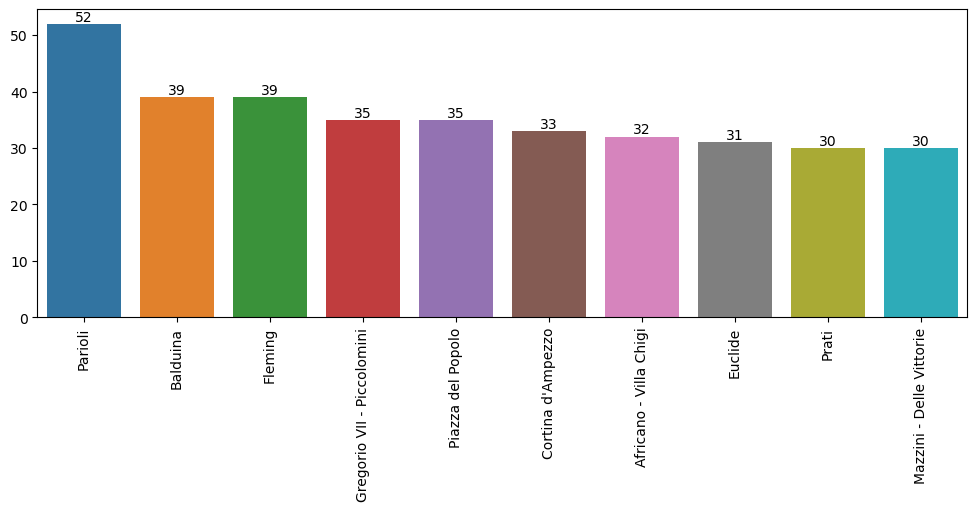

In [51]:
fig, ax = plt.subplots(figsize=(12, 4))

sns.barplot(y=apartaments1.neighborhood.value_counts().head(10).values, 
            x=apartaments1.neighborhood.value_counts().head(10).index, data=apartaments1)

ax.set_xticklabels(ax.get_xticklabels(),rotation=90)

for container in ax.containers:
    ax.bar_label(container)

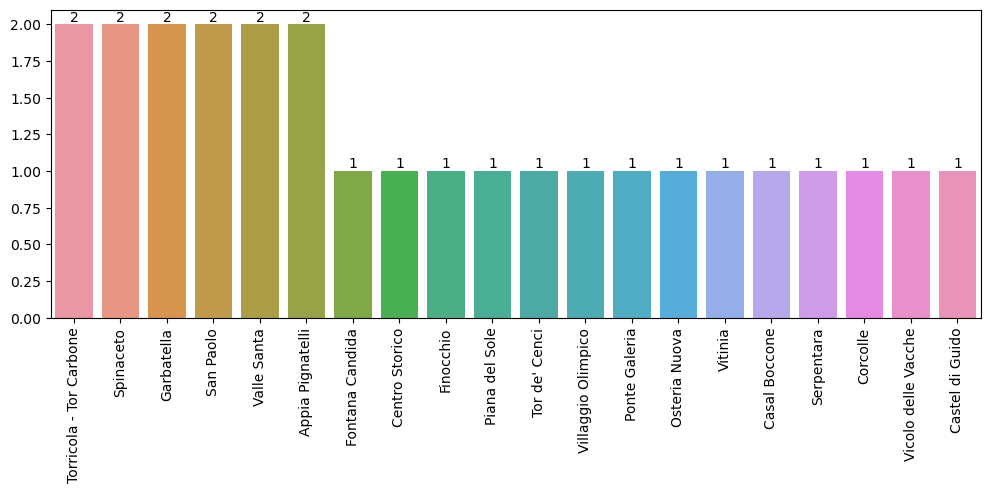

In [52]:
fig, ax = plt.subplots(figsize=(12, 4))

sns.barplot(y=apartaments1.neighborhood.value_counts().tail(20).values, 
            x=apartaments1.neighborhood.value_counts().tail(20).index, data=apartaments1)

ax.set_xticklabels(ax.get_xticklabels(),rotation=90)

for container in ax.containers:
    ax.bar_label(container)

## 2. Distribution of prices

<AxesSubplot:xlabel='price', ylabel='Count'>

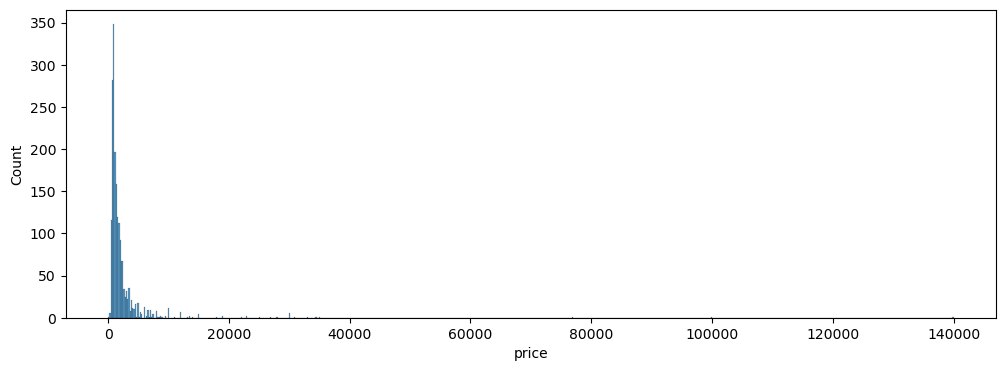

In [53]:
fig, ax = plt.subplots(figsize=(12, 4))
sns.histplot(data=apartaments1, x="price")

<AxesSubplot:xlabel='price'>

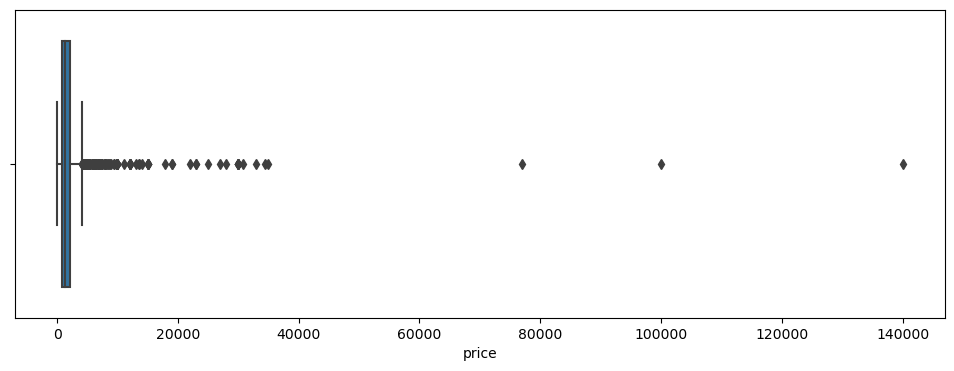

In [54]:
fig, ax = plt.subplots(figsize=(12, 4))
sns.boxplot(data=apartaments1, x='price')

In [55]:
print('97% of the apartments in rome falls below',np.percentile(apartaments1.price, 97).round(2), 'euros')

97% of the apartments in rome falls below 8154.0 euros


**As we can see, the 97% of the apartments in rome falls below 8154.0 euros. That's why the histogram shows it too dispersed, as well as the boxplot. In order to fix this, in going to drop these extreme values (all prices more than 8053.2)**

In [56]:
apartaments2 = apartaments1[apartaments1.price < 8054].reset_index(drop=True).copy()
apartaments2

,Location,neighborhood,price,spaces,size,bathroom,floor,link
0,"Appartamento via Misurina, Cortina d'Ampezzo, ...",Cortina d'Ampezzo,4300,5,261.0,3,2,https://www.immobiliare.it/annunci/99545284/
1,"Trilocale via del corso, Piazza del Popolo, Roma",Piazza del Popolo,2700,3,130.0,2,4,https://www.immobiliare.it/annunci/96624102/
2,"Trilocale via dei Colli della Farnesina, Camil...",Camilluccia - Farnesina,2200,3,140.0,3,1,https://www.immobiliare.it/annunci/99522148/
3,"Appartamento via di San Francesco a Ripa, Tras...",Trastevere,3000,5,145.0,2,2,https://www.immobiliare.it/annunci/97454992/
4,"Attico via della Ferratella in Laterano, San G...",San Giovanni,2800,5+,220.0,3,6,https://www.immobiliare.it/annunci/81553419/
...,...,...,...,...,...,...,...,...
1853,"Appartamento via Marostica, Fleming, Roma",Fleming,1700,5+,146.0,2,2,https://www.immobiliare.it/annunci/99798850/
1854,"Quadrilocale via dei Monti Parioli, Euclide, Roma",Euclide,1800,4,91.0,2,5,https://www.immobiliare.it/annunci/99930540/
1855,"Bilocale via Bruno Bruni, Tomba di Nerone, Roma",Tomba di Nerone,650,2,40.0,1,2,https://www.immobiliare.it/annunci/99761372/
1856,"Villa unifamiliare largo dell'Olgiata, Olgiata...",Olgiata,8000,5+,NaN,3+,no info,https://www.immobiliare.it/annunci/86579424/


### Again, checking the distribution

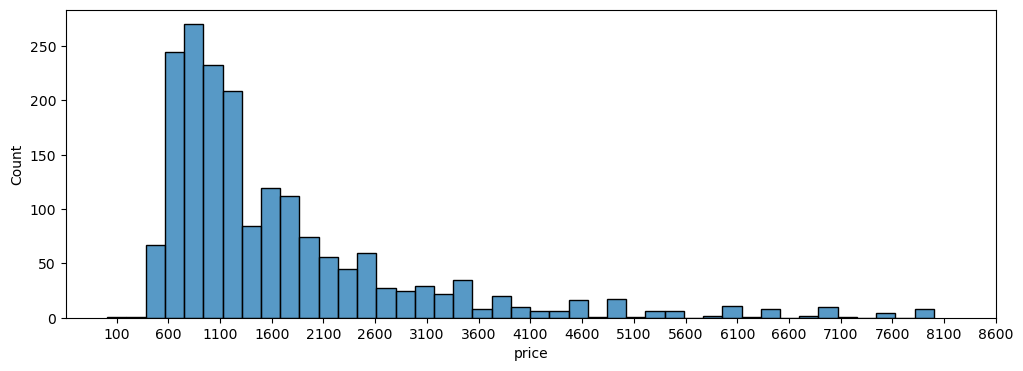

In [57]:
fig, ax = plt.subplots(figsize=(12, 4))
sns.histplot(data=apartaments2, x="price")
ax.set_xticks(range(100,9000,500))

<AxesSubplot:xlabel='price'>

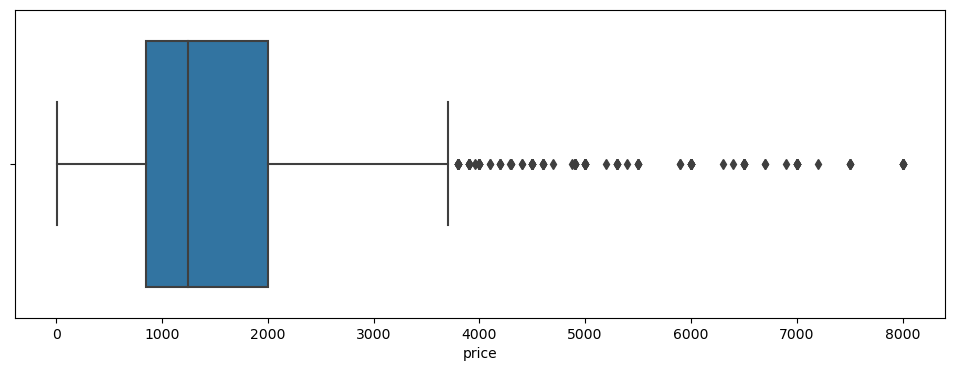

In [58]:
fig, ax = plt.subplots(figsize=(12, 4))
sns.boxplot(data=apartaments2, x='price')

### Now, we can see that the distribution is less dispersed than before but still has outliers.

## 2.1 Relation between prices and size of the property/apartment.

<AxesSubplot:xlabel='price', ylabel='size'>

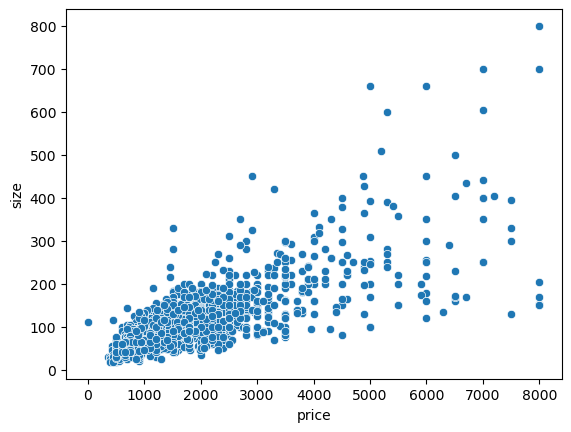

In [59]:
sns.scatterplot(x='price', y='size', data=apartaments2)

**As shown above, there is a positive correlation between price and size of properties/apartments, with some outliers. We are going to check for the correlation analysis.**

In [60]:
apartaments1[['price','size']].corr()

,price,size
price,1.000000,0.702569
size,0.702569,1.000000


**According with the correlation analysis, there is 70.25% of correlation between this two variables.**

## 2.2 Price and number of apartment spaces.

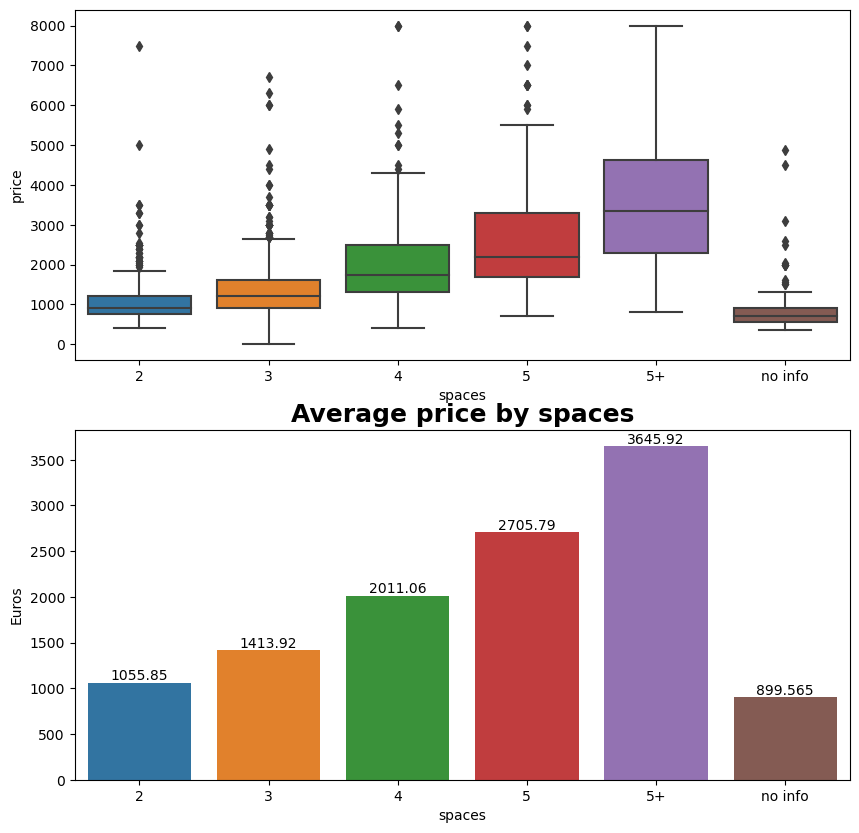

In [61]:
plt.figure(figsize=(10,10))
plt.subplot(2,1,1)
ld=sns.boxplot(y="price", x='spaces', data=apartaments2)


plt.subplot(2,1,2)
ld2=sns.barplot(x="spaces",y="price", data=apartaments2, errorbar=None)
ld2.set(ylabel="Euros")
ld2.set_title('Average price by spaces', 
             fontdict={'fontsize':18, 'fontweight':'bold'}, color='black')
for container in ld2.containers:
    ld2.bar_label(container)

**Both of the above charts show similar information: the boxplot - the median of prices in every kind of spaces apartment, and the barplot the average.**

**We can conclude that the more spaces the apartment has, the more expensive is.**
**Notwithstanding, we could have a problem of data dispersion, what would make our average not so accurate**

## 2.3. Price by neighborhood

In [62]:
neighbor_pri_siz = apartaments2.groupby('neighborhood')['price'].mean().reset_index()
neighbor_pri_siz

,neighborhood,price
0,Acilia,737.500000
1,Africano - Villa Chigi,1843.125000
2,Alessandrino - Torre Spaccata,1057.500000
3,Anagnina,797.777778
4,Appia Pignatelli,3400.000000
...,...,...
177,Villa Fiorelli,1300.000000
178,Villa Gordiani,1097.500000
179,Villaggio Olimpico,1200.000000
180,Vitinia,870.000000


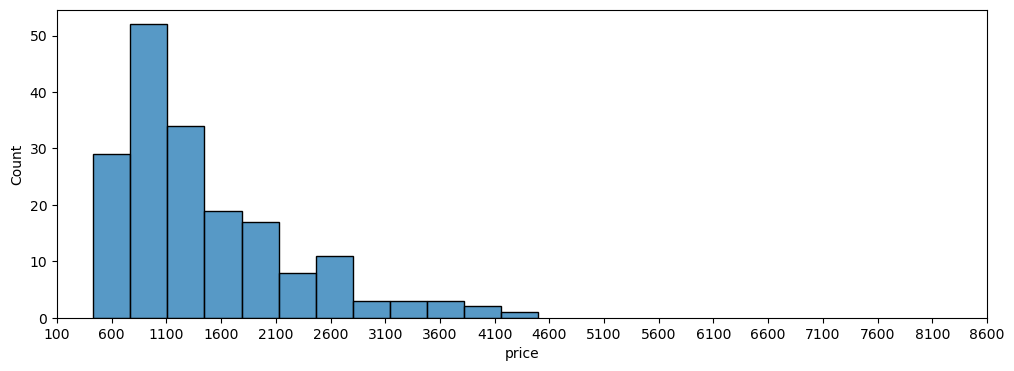

In [75]:
fig, ax = plt.subplots(figsize=(12, 4))
sns.histplot(data=neighbor_pri_siz, x="price")
ax.set_xticks(range(100,9000,500))

### 2.3.1 Lowest and Highest average price by neighborhood.

In [66]:
print('The neighborhood with the highest average price is: ', neighbor_pri_siz.iloc[neighbor_pri_siz['price'].idxmax()][0],
      ', with a price average of', neighbor_pri_siz.iloc[neighbor_pri_siz['price'].idxmax()][1],'euro')
print('The neighborhood with the lowest average price is: ', neighbor_pri_siz.iloc[neighbor_pri_siz['price'].idxmin()][0],
      ', with a price average of', neighbor_pri_siz.iloc[neighbor_pri_siz['price'].idxmin()][1], 'euro')

The neighborhood with the highest average price is:  Olgiata , with a price average of 4500.0 euro
The neighborhood with the lowest average price is:  Corcolle , with a price average of 430.0 euro


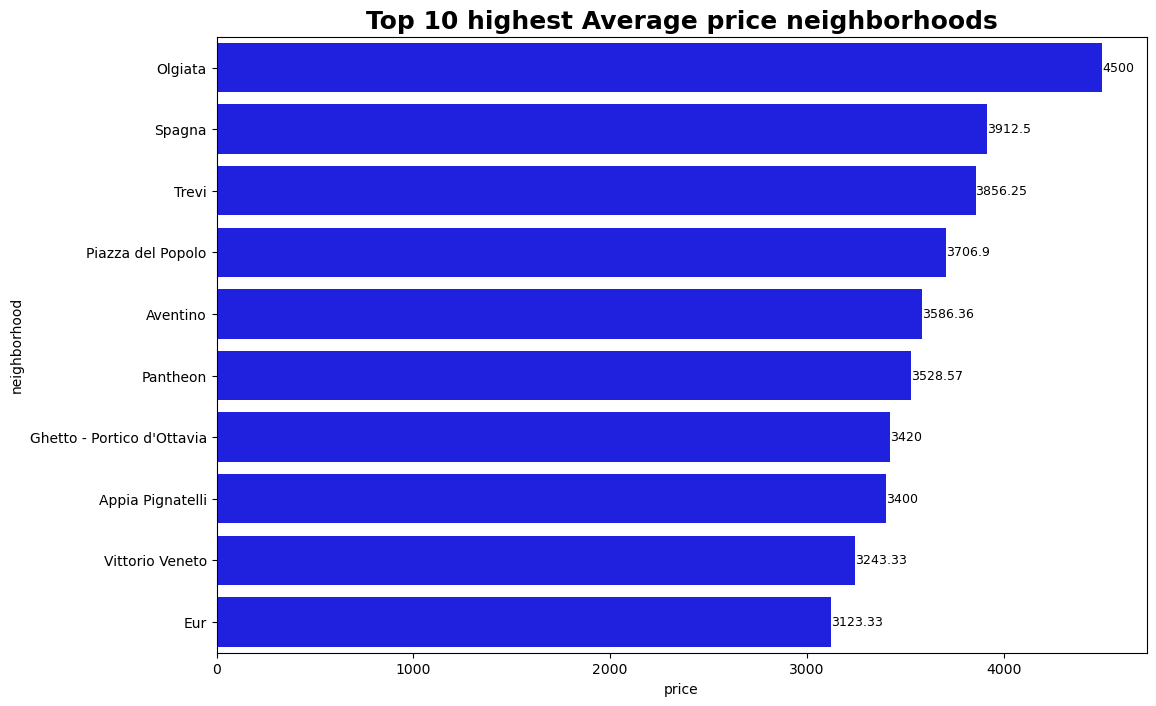

In [121]:
plt.subplots(figsize=(12, 8))
ds=sns.barplot(y=neighbor_pri_siz.neighborhood,x=neighbor_pri_siz.price, data=neighbor_pri_siz, errorbar=None,
           order=neighbor_pri_siz.sort_values('price',ascending=False).neighborhood.head(10), color="b")
ds.set_title('Top 10 highest Average price neighborhoods', 
             fontdict={'fontsize':18, 'fontweight':'bold'}, color='black')
for container in ds.containers:
    ds.bar_label(container, fontsize=9)

### 2.3.2 Now i want to know if the distribution prices for these neighborhood is normal or too dispersed

In [122]:
neighbor_pri_siz.sort_values(by='price').neighborhood.tail(10).tolist()

['Eur',
 'Vittorio Veneto',
 'Appia Pignatelli',
 "Ghetto - Portico d'Ottavia",
 'Pantheon',
 'Aventino',
 'Piazza del Popolo',
 'Trevi',
 'Spagna',
 'Olgiata']

In [123]:
# I want a boxplot with certain neighborhoods 

top10neighbor = apartaments2[apartaments2['neighborhood'].isin(['Eur',
 'Vittorio Veneto',
 'Appia Pignatelli',
 "Ghetto - Portico d'Ottavia",
 'Pantheon',
 'Aventino',
 'Piazza del Popolo',
 'Trevi',
 'Spagna',
 'Olgiata'])]

[Text(0, 0, 'Piazza del Popolo'),
 Text(1, 0, 'Spagna'),
 Text(2, 0, 'Olgiata'),
 Text(3, 0, 'Eur'),
 Text(4, 0, "Ghetto - Portico d'Ottavia"),
 Text(5, 0, 'Aventino'),
 Text(6, 0, 'Appia Pignatelli'),
 Text(7, 0, 'Trevi'),
 Text(8, 0, 'Pantheon'),
 Text(9, 0, 'Vittorio Veneto')]

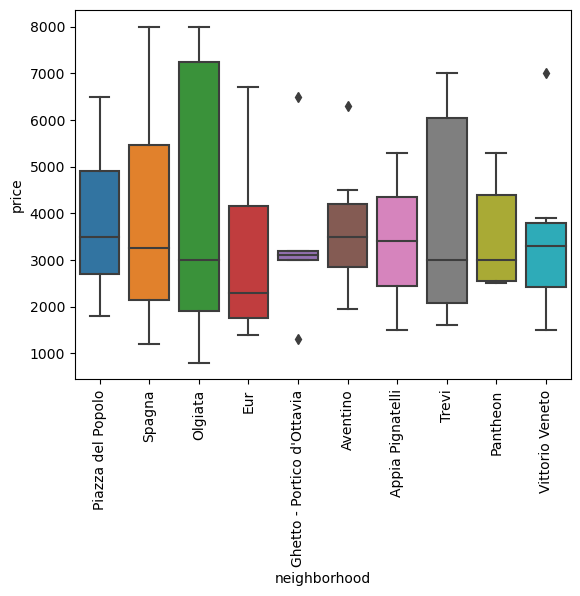

In [120]:
myorder = top10neighbor.groupby(by=["neighborhood"])["price"].median().iloc[::-1].index
dd = sns.boxplot(y="price", x='neighborhood', data=top10neighbor)
dd.set_xticklabels(dd.get_xticklabels(),rotation=90)

**As we could see, these neighborhoods have pretty normal distribution on its prices.**

In [125]:
neighbor_pri_siz.sort_values(by='price')

,neighborhood,price
54,Corcolle,430.000000
118,Ponte Galeria,500.000000
109,Piana del Sole,550.000000
133,Romanina,558.000000
67,Fontana Candida,600.000000
...,...,...
10,Aventino,3586.363636
111,Piazza del Popolo,3706.896552
163,Trevi,3856.250000
144,Spagna,3912.500000


In [126]:
neighbor_pri_siz.sort_values(by='price').neighborhood.head(10).tolist()

['Corcolle',
 'Ponte Galeria',
 'Piana del Sole',
 'Romanina',
 'Fontana Candida',
 'Fioranello',
 'Valle Muricana',
 'Ottavia',
 'Osteria Nuova',
 'Ponte di Nona']

In [129]:
lowestprices = apartaments2[apartaments2['neighborhood'].isin(['Corcolle',
 'Ponte Galeria',
 'Piana del Sole',
 'Romanina',
 'Fontana Candida',
 'Fioranello',
 'Valle Muricana',
 'Ottavia',
 'Osteria Nuova',
 'Ponte di Nona'])]
                            

[Text(0, 0, 'Ponte di Nona'),
 Text(1, 0, 'Valle Muricana'),
 Text(2, 0, 'Romanina'),
 Text(3, 0, 'Fioranello'),
 Text(4, 0, 'Ottavia'),
 Text(5, 0, 'Corcolle'),
 Text(6, 0, 'Osteria Nuova'),
 Text(7, 0, 'Ponte Galeria'),
 Text(8, 0, 'Piana del Sole'),
 Text(9, 0, 'Fontana Candida')]

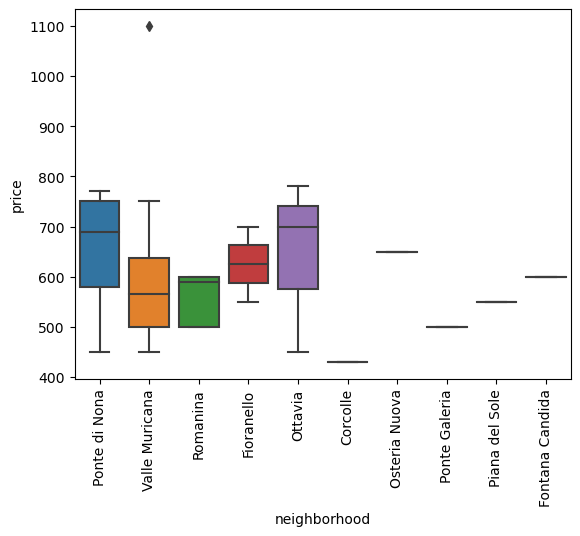

In [130]:
df = sns.boxplot(y="price", x='neighborhood', data=lowestprices)
df.set_xticklabels(df.get_xticklabels(),rotation=90)

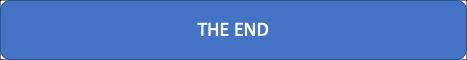